In [16]:
#Analise de Dados
#Enade 2010-2017
#Candidatos do ENADE que estudam em escola EAD e tiveram nota maior que 75

import matplotlib.pyplot as plt
import numpy as np

In [17]:
#criando o caminho para para os arquivos para serem analiazaos
caminho = r"C:\Users\Luis Henrique\Documents\FATEC\Algorítimos\Enade"

In [18]:
#lista de arquivos para serem analizados
arquivos = ['\MICRODADOS_ENADE_2017.txt','\MICRODADOS_ENADE_2016.txt',
            '\MICRODADOS_ENADE_2015.txt','\MICRODADOS_ENADE_2014.txt',
            '\MICRODADOS_ENADE_2013.txt','\MICRODADOS_ENADE_2012.txt',
            '\MICRODADOS_ENADE_2011.txt','\MICRODADOS_ENADE_2010.txt']

In [19]:
#Dicionário onde serão armazenadas as chaves (anos) e valores da análise
grafico = {}

modalidade = 'CO_MODALIDADE'
nota_geral = 'NT_GER'
x = 0
ano = 2017
correspondentes_total = 0

porcentagem = []
years = []

In [20]:
while x < len(arquivos):
    file = open(caminho + arquivos[x])
    rotulos = file.readline().split(';')
    analisados = 0
    correspondentes = 0
    #print(f'\n>> Analisando base de dados do ano de {ano}...')
    for rotulo in rotulos:
        if rotulo == modalidade:
            for linha in file:
                campos = linha.split(';')
                analisados += 1
                if campos[rotulos.index(nota_geral)] != '' and campos[rotulos.index(nota_geral)] != nota_geral:
                    nota_bruta = float(campos[rotulos.index(nota_geral)].replace(',','.'))
                    if campos[rotulos.index(modalidade)] == '0' and nota_bruta >= 75:
                        correspondentes += 1
                        correspondentes_total += 1                    
    #print(f'-> Candidatos analisados: {analisados}')
    #print(f'-> Correspondem aos requisitos da análise: {correspondentes}')

    grafico[ano] = correspondentes
    porcentagem.append(correspondentes)
    years.append(ano)
    ano = ano - 1
    x += 1

In [23]:
print(f'''\nTotal de candidatos analisados, entre 2010 e 2017, 
    que corresponderam à análise: {correspondentes_total}''')


Total de candidatos analisados, entre 2010 e 2017, 
    que corresponderam à análise: 4512


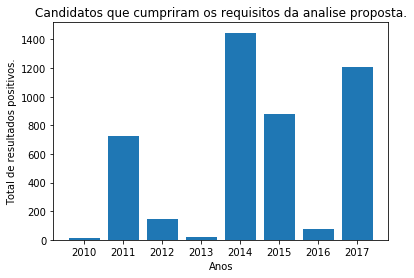

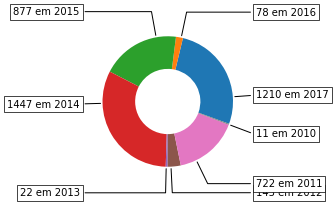

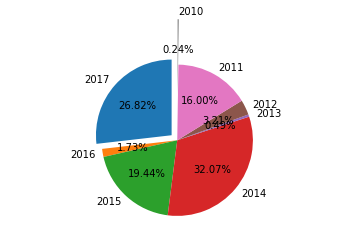

In [24]:
plt.bar(grafico.keys(), grafico.values())
plt.ylabel('Total de resultados positivos.')
plt.xlabel('Anos')
plt.title('Candidatos que cumpriram os requisitos da analise proposta.')

fig, ax = plt.subplots(figsize=(6, 3), subplot_kw=dict(aspect="equal"))

wedges, texts = ax.pie(porcentagem, wedgeprops=dict(width=0.5), startangle=-20)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/4. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(str(porcentagem[i]) + ' em ' + str(years[i]), xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                horizontalalignment=horizontalalignment, **kw)

explodeTuple = (0.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.6)
figureObject, axesObject = plt.subplots()
axesObject.pie(porcentagem, explode=explodeTuple,
        labels = years,
        autopct = '%1.2f%%',
        startangle=90)
axesObject.axis('equal')
plt.show()